In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
dfF= pd.read_csv('.CBS_2021-2023_Full.csv')

FileNotFoundError: [Errno 2] No such file or directory: '.CBS_2021-2023_Full.csv'

In [ ]:
dfF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   ride_id             1048575 non-null  object 
 1   rideable_type       1048575 non-null  object 
 2   started_at          1048575 non-null  object 
 3   ended_at            1048575 non-null  object 
 4   start_station_name  950093 non-null   object 
 5   start_station_id    950093 non-null   object 
 6   end_station_name    939903 non-null   object 
 7   end_station_id      939903 non-null   object 
 8   start_lat           1048573 non-null  float64
 9   start_lng           1048573 non-null  float64
 10  end_lat             1046941 non-null  float64
 11  end_lng             1046941 non-null  float64
 12  member_casual       1048575 non-null  object 
dtypes: float64(4), object(9)
memory usage: 104.0+ MB


In [ ]:
dfF.head(5)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,5CB9DFCECF79AF84,classic_bike,01-01-2021 00:08,01-01-2021 00:33,Maine Ave & 9th St SW,31646.0,Rosslyn Metro / Wilson Blvd & Ft Myer Dr,31015.0,38.880440,-77.025236,38.894600,-77.072305,member
1,629E059504606547,electric_bike,01-01-2021 00:13,01-01-2021 00:29,10th & U St NW,31111.0,NaN,NaN,38.917193,-77.025894,38.960000,-77.020000,casual
2,E74069873161EE33,electric_bike,01-01-2021 00:14,01-01-2021 00:28,17th & Corcoran St NW,31214.0,14th & Belmont St NW,31119.0,38.912138,-77.038568,38.920870,-77.031691,member
3,91F95E512CABC46A,classic_bike,01-01-2021 00:15,01-01-2021 00:21,Wilson Blvd. & N. Vermont St.,31926.0,Wilson Blvd. & N. Vermont St.,31926.0,38.879477,-77.114563,38.879477,-77.114563,member
4,DA46A05139C0EA2F,classic_bike,01-01-2021 00:17,01-01-2021 00:21,11th & Park Rd NW,31651.0,14th & Newton St NW,31649.0,38.931322,-77.028247,38.931991,-77.032956,member


In [ ]:
dfF.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name     98482
start_station_id       98482
end_station_name      108672
end_station_id        108672
start_lat                  2
start_lng                  2
end_lat                 1634
end_lng                 1634
member_casual              0
dtype: int64

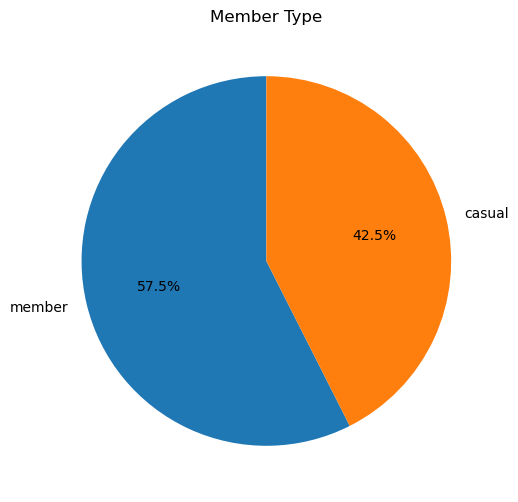

member_casual
member    602421
casual    446154
Name: count, dtype: int64


In [ ]:
# 1. Ride Frequency
ride_counts = dfF['member_casual'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(ride_counts, labels=ride_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Member Type")
plt.show()
print(ride_counts)

In [19]:
# dfF['started_at'] = pd.to_datetime(dfF['started_at'])
# dfF['ended_at'] = pd.to_datetime(dfF['ended_at'])
# dfF['Month'] = dfF['started_at'].dt.strftime('%B')
# dfF["year"]=dfF["started_at"].dt.year
# dfF["start_hour"]=dfF["started_at"].dt.hour
# dfF["end_hour"]=dfF["ended_at"].dt.hour
# dfF["day"] = dfF["started_at"].dt.day
# dfF["day of week"] = dfF["started_at"].dt.strftime("%A")
# dfF["date_is_weekend"] = np.where(dfF["day of week"].isin([5, 6]),1,0)

In [20]:
# Remove rows with missing values
dfF_cleaned = dfF.dropna()
dfF_cleaned.head(3)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,5CB9DFCECF79AF84,classic_bike,01-01-2021 00:08,01-01-2021 00:33,Maine Ave & 9th St SW,31646.0,Rosslyn Metro / Wilson Blvd & Ft Myer Dr,31015.0,38.880440,-77.025236,38.894600,-77.072305,member
2,E74069873161EE33,electric_bike,01-01-2021 00:14,01-01-2021 00:28,17th & Corcoran St NW,31214.0,14th & Belmont St NW,31119.0,38.912138,-77.038568,38.920870,-77.031691,member
3,91F95E512CABC46A,classic_bike,01-01-2021 00:15,01-01-2021 00:21,Wilson Blvd. & N. Vermont St.,31926.0,Wilson Blvd. & N. Vermont St.,31926.0,38.879477,-77.114563,38.879477,-77.114563,member


In [21]:
dfF_cleaned.isnull().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
dtype: int64

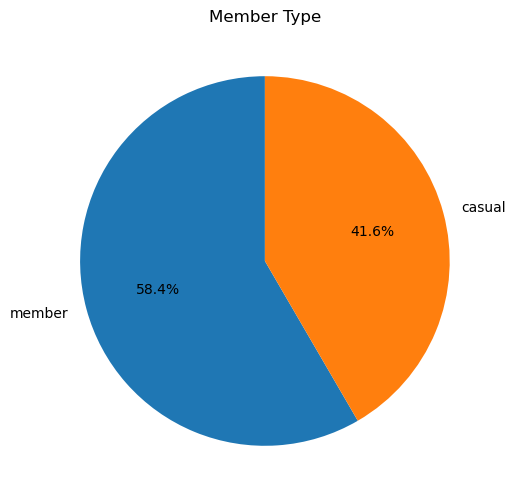

member_casual
member    527627
casual    376100
Name: count, dtype: int64


In [22]:
# 1. Ride Frequency
ride_counts = dfF_cleaned['member_casual'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(ride_counts, labels=ride_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Member Type")
plt.show()
print(ride_counts)

In [26]:
dfF_cleaned['started_at'] = pd.to_datetime(dfF_cleaned['started_at'], dayfirst=True)
dfF_cleaned['ended_at'] = pd.to_datetime(dfF_cleaned['ended_at'], dayfirst=True)

In [29]:
dfF_cleaned['Month'] = dfF_cleaned['started_at'].dt.strftime('%B')
dfF_cleaned["year"]=dfF_cleaned["started_at"].dt.year
dfF_cleaned["start_hour"]=dfF_cleaned["started_at"].dt.hour
dfF_cleaned["end_hour"]=dfF_cleaned["ended_at"].dt.hour
dfF_cleaned["day"] = dfF_cleaned["started_at"].dt.day
dfF_cleaned["day of week"] = dfF_cleaned["started_at"].dt.strftime("%A")
dfF_cleaned["date_is_weekend"] = np.where(dfF_cleaned["day of week"].isin([5, 6]),1,0)

In [30]:
dfF_cleaned.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'Month', 'year', 'start_hour', 'end_hour', 'day',
       'day of week', 'date_is_weekend'],
      dtype='object')

In [25]:
# import pandas as pd

# # Assuming you have a column indicating the year (e.g., 'Year')
# dfF2021 = dfF[dfF['year'] == 2021]
# dfF2022 = dfF[dfF['year'] == 2022]
# dfF2023 = dfF[dfF['year'] == 2023]

# # Save each dataset to a separate CSV file
# dfF2021.to_csv('dfF2021.csv', index=False)
# dfF2022.to_csv('dfF2022.csv', index=False)
# dfF2023.to_csv('dfF2023.csv', index=False)

In [31]:
# Calculate trip duration in seconds
dfF_cleaned['trip_duration'] = (dfF_cleaned['ended_at'] - dfF_cleaned['started_at']).dt.total_seconds()

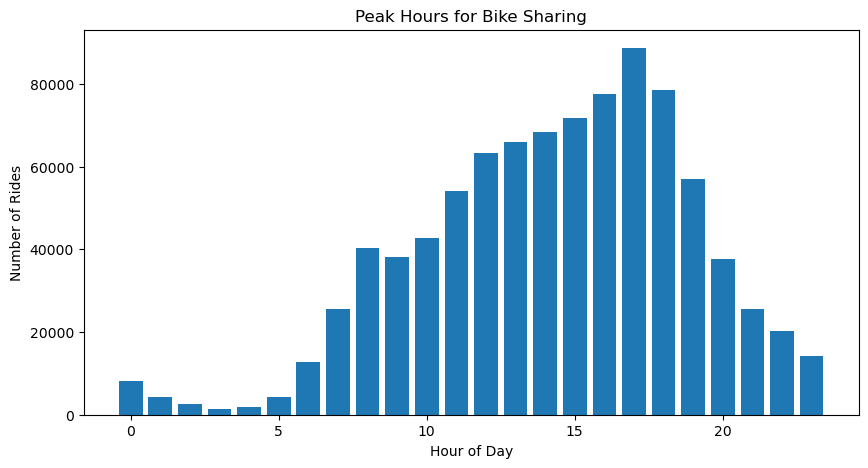

In [ ]:
# Peak hours
dfF_cleaned['start_hour'] = dfF_cleaned['started_at'].dt.hour
peak_hours = dfF_cleaned['start_hour'].value_counts().sort_index()
plt.figure(figsize=(10, 5))
plt.bar(peak_hours.index, peak_hours.values)
plt.xlabel('Hour of Day')
plt.ylabel('Number of Rides')
plt.title('Peak Hours for Bike Sharing')
plt.show()


In [33]:
dfF_cleaned['time_of_day'] = dfF_cleaned['start_hour'].apply(lambda value: 'Morning' if value in (4,5,6,7,8,9,10,11)
                                                        else 'Afternoon' if value in (12,13,14,15,16)
                                                        else 'Evening' if value in (17,18,19,20,21) 
                                                        else 'Night')

dfF_cleaned['time_of_day'] = pd.Categorical(dfF_cleaned['time_of_day'],
categories=["Morning","Afternoon","Evening","Night"])

In [34]:
# create trip duration column
dfF_cleaned["trip_duration_min"] = np.round((dfF_cleaned["ended_at"] - dfF_cleaned["started_at"]) / np.timedelta64(1,"m"),0)

In [36]:
print(f"Max trip duration : {dfF_cleaned["trip_duration_min"].max()}")
print(f"Min trip duration : {dfF_cleaned["trip_duration_min"].min()}")

Max trip duration : 54540.0
Min trip duration : -4.0


In [ ]:
dfF_cleaned["rideable_type"].value_counts()

rideable_type
classic_bike     715140
electric_bike    107243
docked_bike       81344
Name: count, dtype: int64

In [38]:
dfF_cleaned.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'Month', 'year', 'start_hour', 'end_hour', 'day',
       'day of week', 'date_is_weekend', 'trip_duration', 'time_of_day',
       'trip_duration_min'],
      dtype='object')

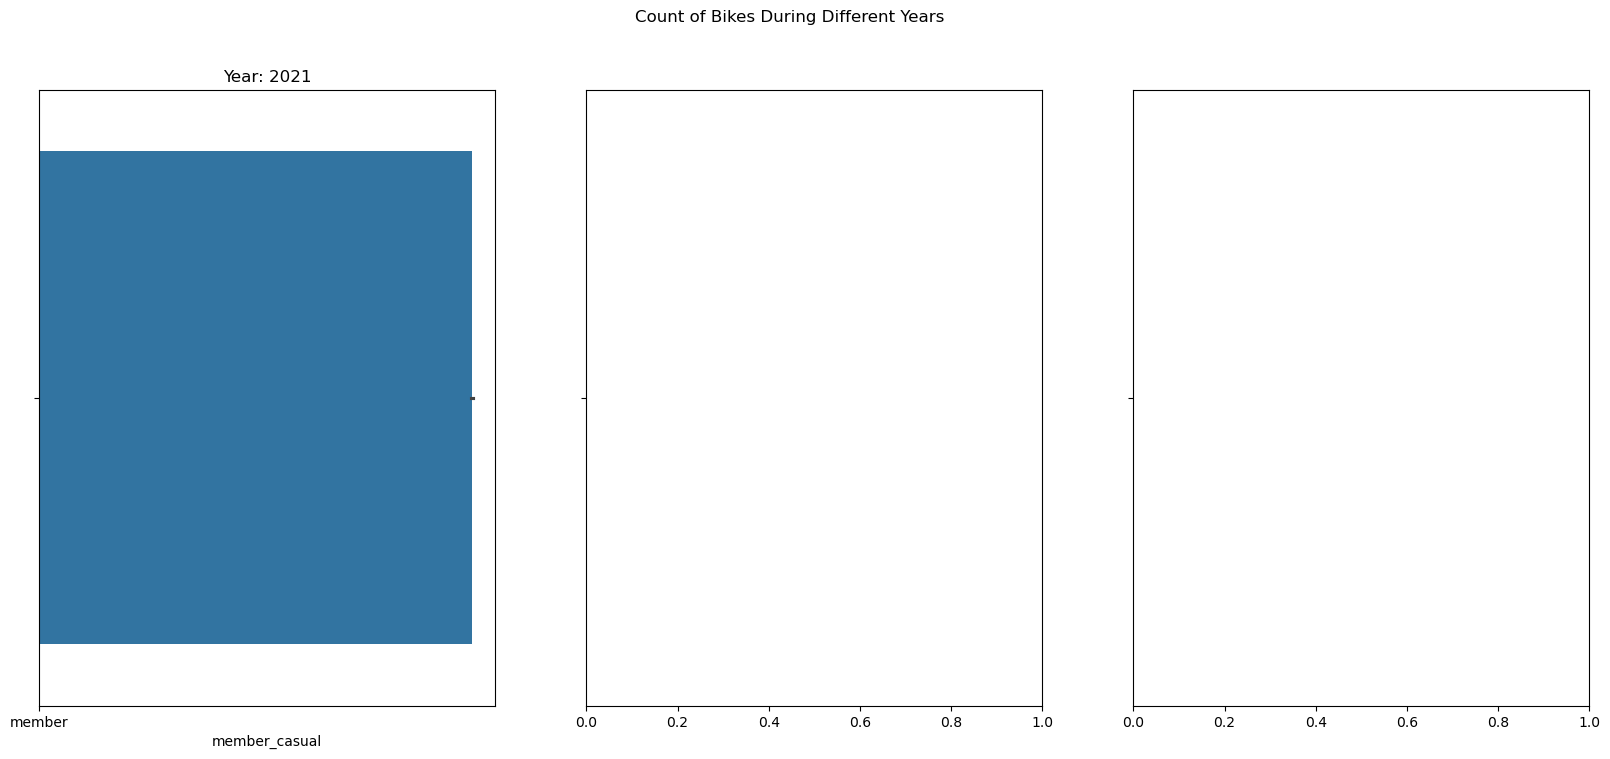

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 8),  sharey=True)
fig.suptitle('Count of Bikes During Different Years')

for i, year in enumerate(dfF_cleaned['year'].unique()):
    year_data = dfF_cleaned[dfF_cleaned['year'] == year]
    sns.barplot(data=year_data, x='member_casual', ax=axes[i])
    axes[i].set_title(f'Year: {year}')

In [18]:

# plt.figure(figsize=(8,7),)
# sns.barplot(x="Weekdays", y="user_count", hue="User_type", data=dfF_cleaned, palette="muted")
# plt.xlabel('Start Station - End Station')
# plt.xticks(rotation=45, ha='right')
# plt.ylabel('Number of Rides')

Text(0, 0.5, 'Number of Rides')

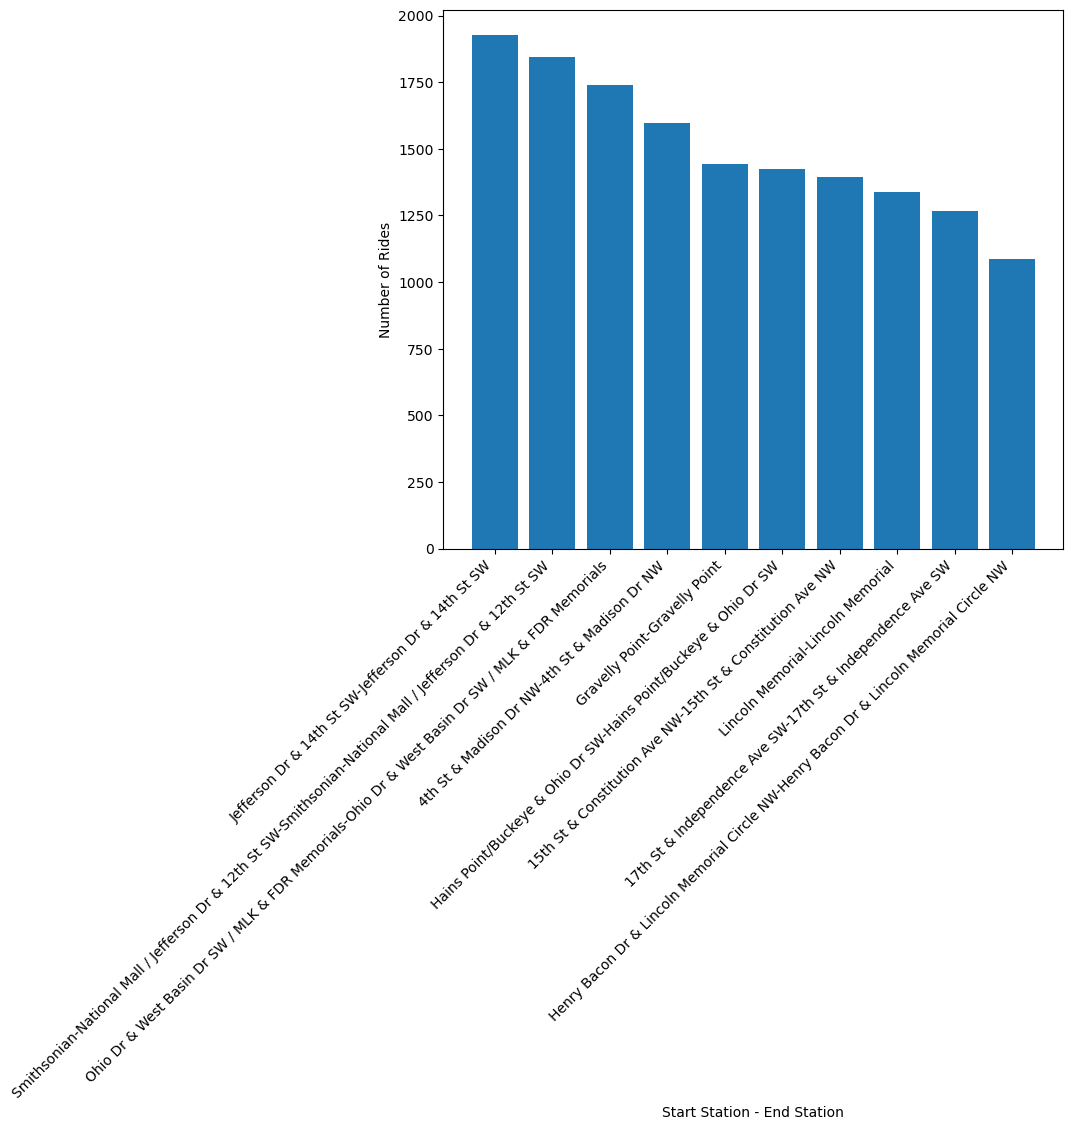

In [ ]:
popular_routes = dfF_cleaned.groupby(['start_station_name', 'end_station_name']).size().nlargest(10)

# Extract labels from the MultiIndex
labels = popular_routes.index.get_level_values('start_station_name') + '-' + popular_routes.index.get_level_values('end_station_name')

plt.figure(figsize=(8,7),)
plt.bar(labels, popular_routes.values)  # Use labels as x-axis labels
plt.xlabel('Start Station - End Station')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of Rides')

In [20]:
# plt.figure(figsize=(10, 6))

# # Calculate mean 'total_count' for each hour and season
# sns.lineplot(x='Hour', y='Total_rides', data=dfF_cleaned, hue='member_casual', err_style="bars")

# # Add title and labels
# plt.title('Hourly distribution of bike rentals')
# plt.xlabel('Hour')
# plt.ylabel('total_Rides')

# # Show the plot
# plt.show()

In [21]:
dfF_cleaned.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'Month', 'year', 'start_hour', 'end_hour', 'day',
       'day of week', 'date_is_weekend', 'trip_duration', 'time_of_day',
       'trip_duration_min'],
      dtype='object')

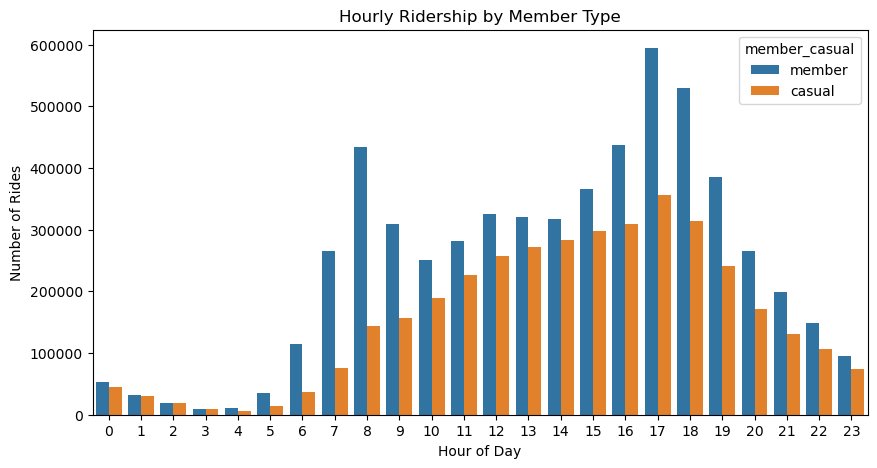

In [22]:
# Hourly ridership comparison
plt.figure(figsize=(10, 5))
sns.countplot(x='start_hour', hue='member_casual', data=dfF_cleaned)
plt.xlabel('Hour of Day')
plt.ylabel('Number of Rides')
plt.title('Hourly Ridership by Member Type')
plt.show()


In [24]:
# import pandas as pd

# # Assuming you have a column indicating the year (e.g., 'Year')
# dfF_cleaned_2021 = dfF_cleaned[dfF_cleaned['year'] == 2021]
# dfF_cleaned_2022 = dfF_cleaned[dfF_cleaned['year'] == 2022]
# dfF_cleaned_2023 = dfF_cleaned[dfF_cleaned['year'] == 2023]

# # Save each dataset to a separate CSV file
# dfF_cleaned_2021.to_csv('data_2021.csv', index=False)
# dfF_cleaned_2022.to_csv('data_2022.csv', index=False)
# dfF_cleaned_2023.to_csv('data_2023.csv', index=False)

In [ ]:
dfF_cleaned

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,Month,year,start_hour,end_hour,day,day of week,date_is_weekend,trip_duration,time_of_day,trip_duration_min
0,5CB9DFCECF79AF84,classic_bike,2021-01-01 00:08:00,2021-01-01 00:33:00,Maine Ave & 9th St SW,31646.0,Rosslyn Metro / Wilson Blvd & Ft Myer Dr,31015.0,38.880440,-77.025236,...,January,2021,0,0,1,Friday,0,1500.0,Night,25.0
2,E74069873161EE33,electric_bike,2021-01-01 00:14:00,2021-01-01 00:28:00,17th & Corcoran St NW,31214.0,14th & Belmont St NW,31119.0,38.912138,-77.038568,...,January,2021,0,0,1,Friday,0,840.0,Night,14.0
3,91F95E512CABC46A,classic_bike,2021-01-01 00:15:00,2021-01-01 00:21:00,Wilson Blvd. & N. Vermont St.,31926.0,Wilson Blvd. & N. Vermont St.,31926.0,38.879477,-77.114563,...,January,2021,0,0,1,Friday,0,360.0,Night,6.0
4,DA46A05139C0EA2F,classic_bike,2021-01-01 00:17:00,2021-01-01 00:21:00,11th & Park Rd NW,31651.0,14th & Newton St NW,31649.0,38.931322,-77.028247,...,January,2021,0,0,1,Friday,0,240.0,Night,4.0
6,0535306B61EF92F9,classic_bike,2021-01-01 00:19:00,2021-01-01 00:36:00,Bladensburg Rd & Benning Rd NE,31617.0,Good Hope Rd & MLK Ave SE,31802.0,38.900413,-76.982872,...,January,2021,0,0,1,Friday,0,1020.0,Night,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,293926021F7CB636,classic_bike,2021-06-26 00:08:00,2021-06-26 00:22:00,Smithsonian-National Mall / Jefferson Dr & 12t...,31248.0,17th & G St NW,31277.0,38.888774,-77.028694,...,June,2021,0,0,26,Saturday,0,840.0,Night,14.0
1048571,03F7F6CF315DA652,classic_bike,2021-06-26 00:08:00,2021-06-26 00:23:00,Georgetown Harbor / 30th St NW,31215.0,N Veitch St & 20th St N,31029.0,38.902314,-77.059141,...,June,2021,0,0,26,Saturday,0,900.0,Night,15.0
1048572,C5A7AE4B1D09B794,classic_bike,2021-06-26 00:08:00,2021-06-26 00:23:00,Smithsonian-National Mall / Jefferson Dr & 12t...,31248.0,17th & G St NW,31277.0,38.888774,-77.028694,...,June,2021,0,0,26,Saturday,0,900.0,Night,15.0
1048573,270904164950CEF9,classic_bike,2021-06-26 00:08:00,2021-06-26 00:23:00,Smithsonian-National Mall / Jefferson Dr & 12t...,31248.0,17th & G St NW,31277.0,38.888774,-77.028694,...,June,2021,0,0,26,Saturday,0,900.0,Night,15.0


In [67]:
member_start = dfF_cleaned[dfF_cleaned['member_casual'] == 'member']['start_station_name'].value_counts().head(10)
casual_start = dfF_cleaned[dfF_cleaned['member_casual'] == 'casual']['start_station_name'].value_counts().head(10)
member_destination = dfF_cleaned[dfF_cleaned['member_casual'] == 'member']['end_station_name'].value_counts().head(10)
casual_destination = dfF_cleaned[dfF_cleaned['member_casual'] == 'casual']['end_station_name'].value_counts().head(10)

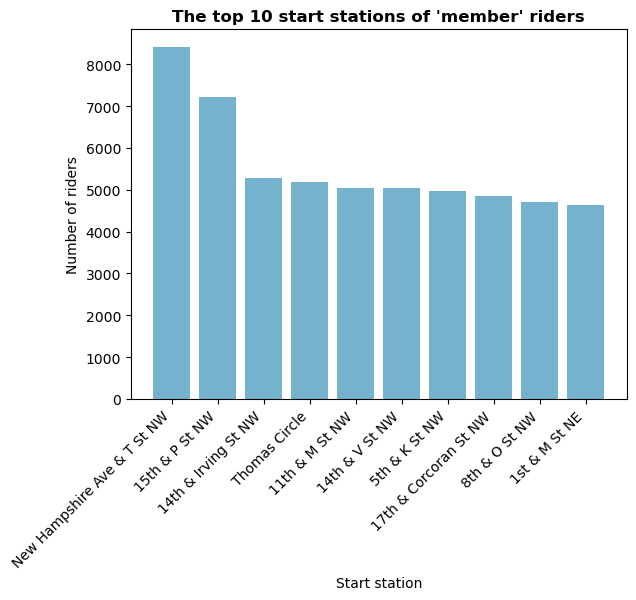

The top 10 start stations of 'member' riders


start_station_name
New Hampshire Ave & T St NW    8414
15th & P St NW                 7215
14th & Irving St NW            5273
Thomas Circle                  5179
11th & M St NW                 5050
14th & V St NW                 5035
5th & K St NW                  4965
17th & Corcoran St NW          4863
8th & O St NW                  4720
1st & M St NE                  4644
Name: count, dtype: int64

In [68]:
plt.bar(member_start.index,member_start, color = "#75b2ce" )
plt.xticks(rotation = 45, ha = 'right')
plt.title("The top 10 start stations of 'member' riders", fontweight="bold")
# labels for the x and y axes
plt.xlabel('Start station')
plt.ylabel ('Number of riders')
plt.show()

print ("The top 10 start stations of 'member' riders")
member_start

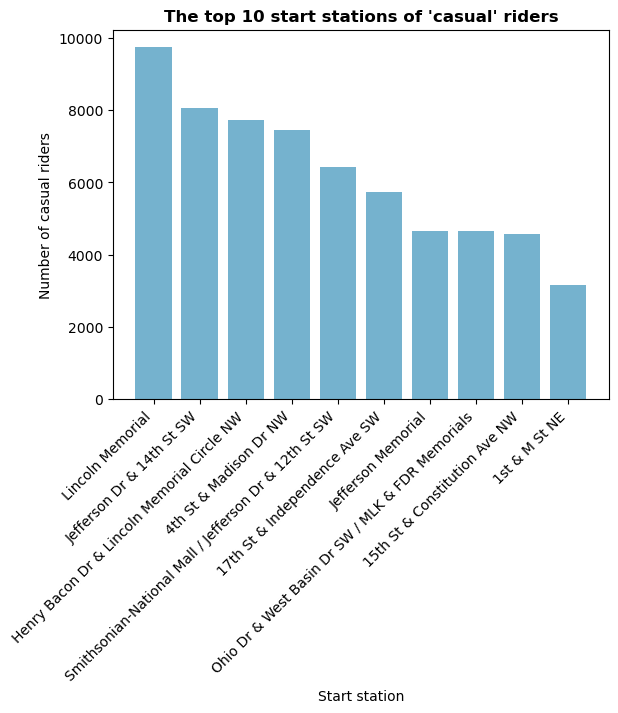

The top 10 start stations of 'casual' riders


start_station_name
Lincoln Memorial                                         9742
Jefferson Dr & 14th St SW                                8053
Henry Bacon Dr & Lincoln Memorial Circle NW              7720
4th St & Madison Dr NW                                   7466
Smithsonian-National Mall / Jefferson Dr & 12th St SW    6427
17th St & Independence Ave SW                            5730
Jefferson Memorial                                       4661
Ohio Dr & West Basin Dr SW / MLK & FDR Memorials         4649
15th St & Constitution Ave NW                            4586
1st & M St NE                                            3152
Name: count, dtype: int64

In [69]:
#The top 10 start station of 'casual' riders"
plt.bar(casual_start.index,casual_start, color = "#75b2ce")
plt.xticks(rotation = 45, ha = 'right')
plt.title("The top 10 start stations of 'casual' riders", fontweight="bold")
# labels for the x and y axes
plt.xlabel('Start station')
plt.ylabel ('Number of casual riders')
plt.show()
print("The top 10 start stations of 'casual' riders")
casual_start

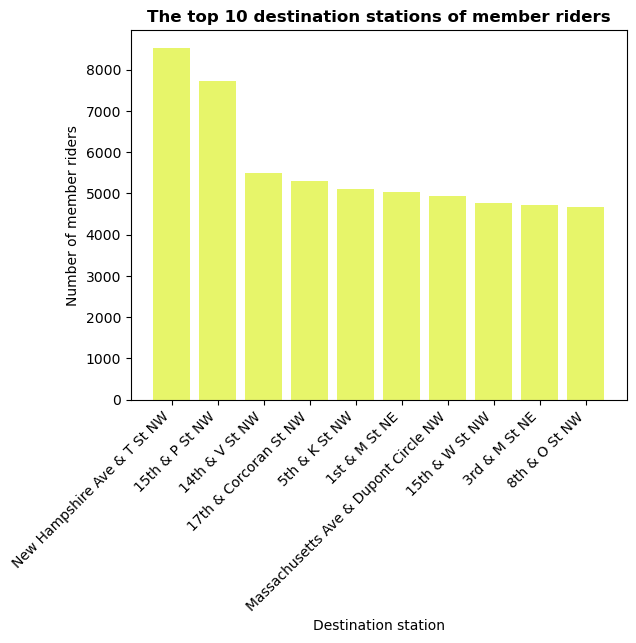

The top 10 destination stations of member riders


end_station_name
New Hampshire Ave & T St NW             8534
15th & P St NW                          7715
14th & V St NW                          5501
17th & Corcoran St NW                   5293
5th & K St NW                           5095
1st & M St NE                           5039
Massachusetts Ave & Dupont Circle NW    4928
15th & W St NW                          4755
3rd & M St NE                           4718
8th & O St NW                           4664
Name: count, dtype: int64

In [ ]:
#The top 10 destination stations of member riders
plt.bar(member_destination.index, member_destination, color = "#e7f56a")
plt.xticks(rotation = 45, ha = 'right')
plt.title("The top 10 destination stations of member riders", fontweight="bold")
# labels for the x and y axes
plt.xlabel('Destination station')
plt.ylabel ('Number of member riders')
plt.show()
print("The top 10 destination stations of member riders")
member_destination

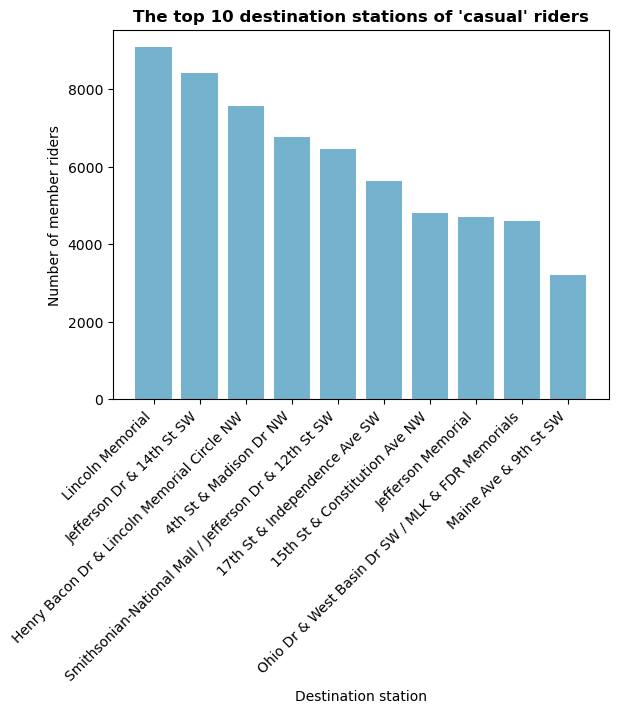

The top 10 destination stations for 'casual' riders


end_station_name
Lincoln Memorial                                         9083
Jefferson Dr & 14th St SW                                8418
Henry Bacon Dr & Lincoln Memorial Circle NW              7558
4th St & Madison Dr NW                                   6766
Smithsonian-National Mall / Jefferson Dr & 12th St SW    6450
17th St & Independence Ave SW                            5645
15th St & Constitution Ave NW                            4807
Jefferson Memorial                                       4711
Ohio Dr & West Basin Dr SW / MLK & FDR Memorials         4591
Maine Ave & 9th St SW                                    3218
Name: count, dtype: int64

In [71]:
#The top 10 destination station of 'casual' riders
plt.bar(casual_destination.index,casual_destination, color = "#75b2ce")
plt.xticks(rotation = 45, ha = 'right')
plt.title("The top 10 destination stations of 'casual' riders", fontweight="bold")
# labels for the x and y axes
plt.xlabel('Destination station')
plt.ylabel ('Number of member riders')
plt.show()

print ("The top 10 destination stations for 'casual' riders")
casual_destination

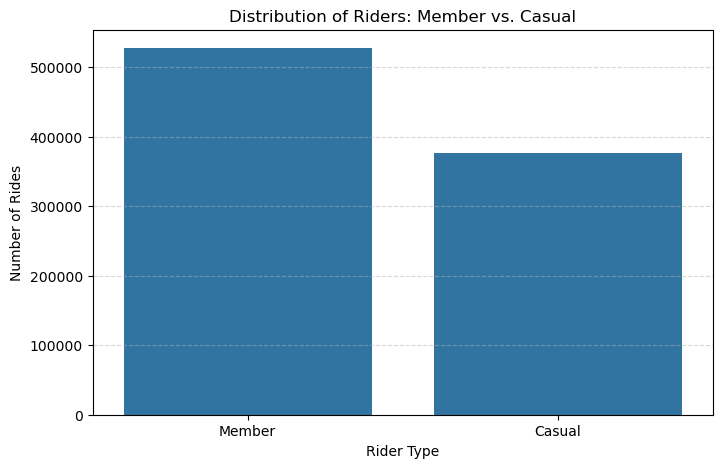

In [47]:
plt.figure(figsize=(8, 5)) 

# Create the countplot
sns.countplot(x='member_casual', data=dfF_cleaned)

# Set title and labels
plt.title('Distribution of Riders: Member vs. Casual')
plt.xlabel('Rider Type')
plt.ylabel('Number of Rides')

# Customize appearance (optional)
plt.xticks(ticks=[0, 1], labels=['Member','Casual']) 
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Show the plot
plt.show()

In [26]:
# plt.figure(figsize=(6, 5))
# sns.histplot(dfF_cleaned['member_casual'], shrink=0.7)
# plt.xlabel('Member Type')
# plt.ylabel('Trip Duration (seconds)')
# plt.title('Trip Duration by Member Type')
# plt.show()


In [48]:
# Analyze station congestion
station_usage = pd.concat([dfF_cleaned['start_station_name'], dfF_cleaned['end_station_name']])
station_counts = station_usage.value_counts()

In [50]:
# Identify stations with high usage
high_usage_stations = station_counts[station_counts > 1000]  # Adjust threshold as needed
print("Stations with High Usage:\n", high_usage_stations)


Stations with High Usage:
 Lincoln Memorial                                        23791
New Hampshire Ave & T St NW                             21578
Jefferson Dr & 14th St SW                               20343
4th St & Madison Dr NW                                  19801
15th & P St NW                                          19680
                                                        ...  
East Falls Church Metro / Sycamore St & 19th St N        1041
28th St & S Meade St                                     1026
Friendship Hts Metro / Wisconsin Ave & Wisconsin Cir     1021
National Airport                                         1006
Potomac Greens Dr & Slaters Ln                           1003
Name: count, Length: 327, dtype: int64


In [73]:
high_usage_stations.head(10)

Lincoln Memorial                                         23791
New Hampshire Ave & T St NW                              21578
Jefferson Dr & 14th St SW                                20343
4th St & Madison Dr NW                                   19801
15th & P St NW                                           19680
Henry Bacon Dr & Lincoln Memorial Circle NW              18892
Smithsonian-National Mall / Jefferson Dr & 12th St SW    16494
1st & M St NE                                            16050
14th & V St NW                                           14917
Jefferson Memorial                                       14322
Name: count, dtype: int64

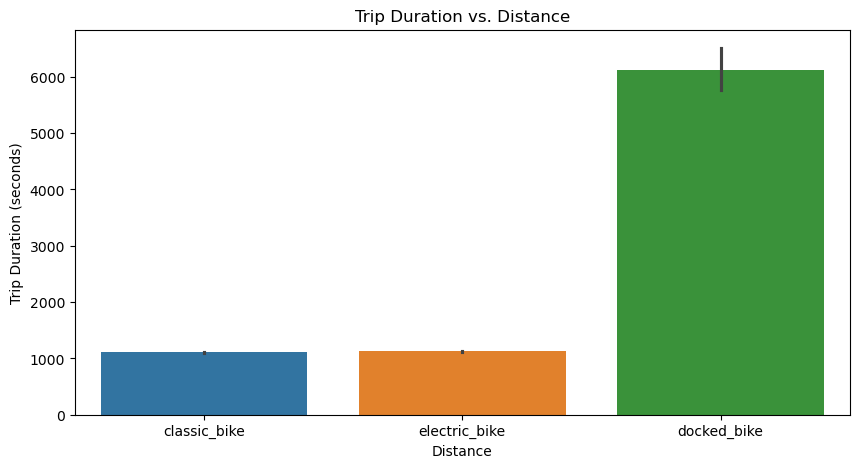

In [ ]:
# Trip duration vs. distance
# Assuming you have calculated distance in a separate step
plt.figure(figsize=(10, 5))
sns.barplot(x='rideable_type', y='trip_duration', hue='rideable_type', data=dfF_cleaned)
plt.xlabel('Distance')
plt.ylabel('Trip Duration (seconds)')
plt.title('Trip Duration vs. Distance')
plt.show()


In [ ]:
# fig, ax = plt.subplots(figsize=(8,6))
# sns.barplot(data=dfF_cleaned, x='year', ax=ax)
# ax.set(title='Count of bikes during different years')

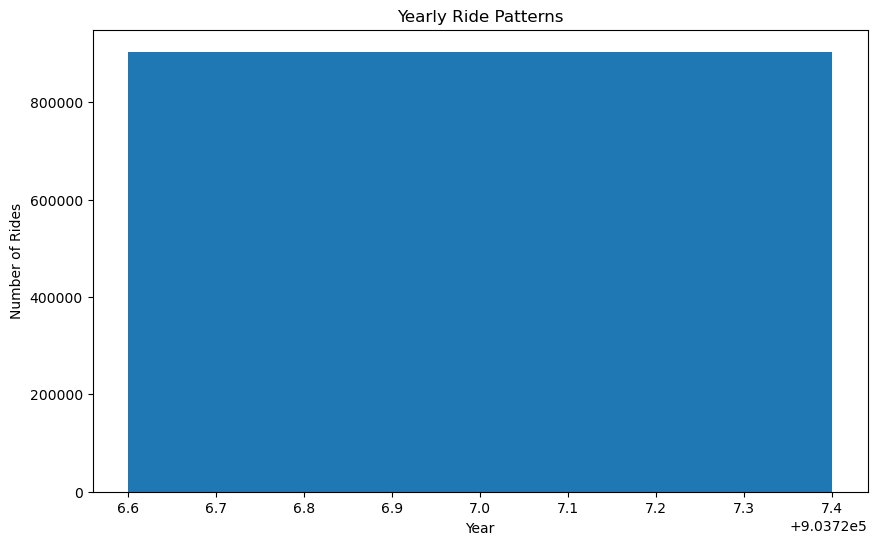

In [ ]:
# Yearly Ride Patterns (if available)
if 'year' in dfF_cleaned.columns:
    yearly_rides = dfF_cleaned.groupby('year')['ride_id'].count()

    plt.figure(figsize=(10, 6))
    plt.bar(yearly_rides, yearly_rides.values)
    plt.xlabel("Year")
    plt.ylabel("Number of Rides")
    plt.title("Yearly Ride Patterns")
    plt.show()

In [41]:
# import pandas as pd

# # Assuming your DataFrame is named 'df' and the column is 'rideable_type'

# # Create separate DataFrames for each rideable_type
# classic_bike = dfF_cleaned[dfF_cleaned['rideable_type'] == 'classic_bike']
# electric_bike = dfF_cleaned[dfF_cleaned['rideable_type'] == 'electric_bike']
# docked_bike = dfF_cleaned[dfF_cleaned['rideable_type'] == 'docked_bike']

# # Print the shapes of the resulting DataFrames (optional)
# # print(f"Classic Bike DataFrame shape: {classic_bike.shape}")
# # print(f"Electric Bike DataFrame shape: {electric_bike.shape}")
# # print(f"Docked Bike DataFrame shape: {docked_bike.shape}")

# # Save each dataset to a separate CSV file
# classic_bike.to_csv('classicbike.csv', index=False)
# electric_bike.to_csv('electricbike.csv', index=False)
# docked_bike.to_csv('dockedbike.csv', index=False)


In [57]:
dfF_cleaned.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'Month', 'year', 'start_hour', 'end_hour', 'day',
       'day of week', 'date_is_weekend', 'trip_duration', 'time_of_day',
       'trip_duration_min'],
      dtype='object')

In [ ]:
dfF_cleaned["rideable_type"].value_counts()

rideable_type
classic_bike     715140
electric_bike    107243
docked_bike       81344
Name: count, dtype: int64

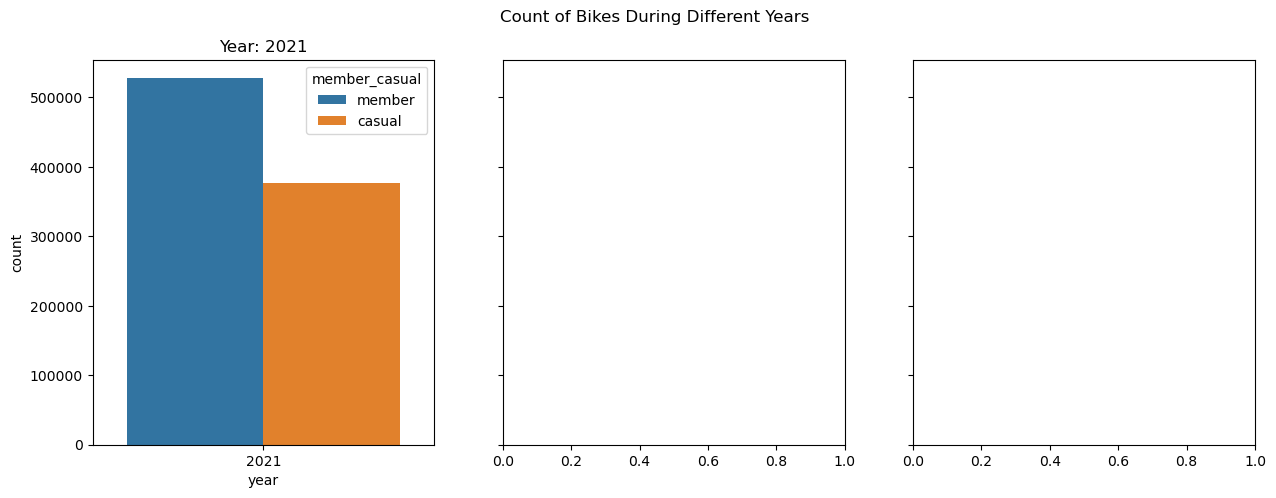

In [91]:
# Create separate subplots for each year
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5),  sharey=True)
fig.suptitle('Count of Bikes During Different Years')

for i, year in enumerate(dfF_cleaned['year'].unique()):
    year_data = dfF_cleaned[dfF_cleaned['year'] == year]
    sns.countplot(data=year_data, x='year', hue='member_casual', ax=axes[i])
    axes[i].set_title(f'Year: {year}')

plt.show()

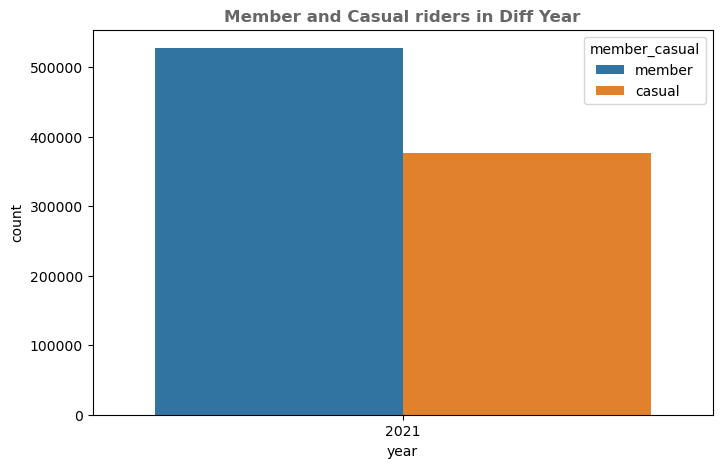

In [ ]:
plt.figure(figsize=(8,5))
# fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 8), sharey=True)
sns.countplot(x = 'year', hue = 'member_casual', data = dfF_cleaned)
plt.title('Member and Casual riders in Diff Year', fontweight="bold", alpha=0.6,)
plt.show()

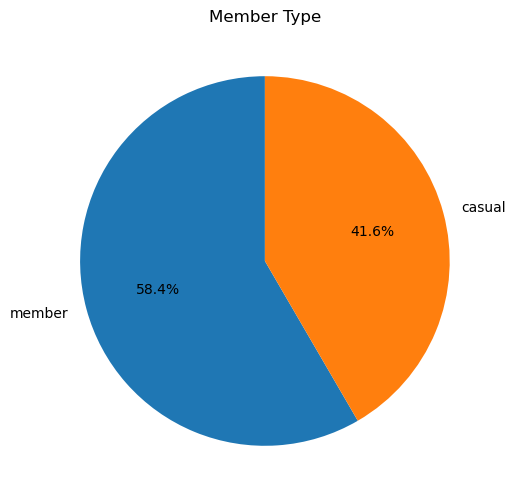

member_casual
member    527627
casual    376100
Name: count, dtype: int64


In [ ]:
# Ride Frequency
ride_counts = dfF_cleaned['member_casual'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(ride_counts, labels=ride_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Member Type")
plt.show()
print(ride_counts)

In [62]:
import numpy as np
import folium
from folium import plugins

In [63]:
m=folium.Map()
m

In [66]:
# After that, we can immediately set on creating a map
m=folium.Map()

# By default it will show the world map zoomed out all the way. We can
# remedy that by passing arguments.

m=folium.Map(location=[38.880440 , -77.025236],   # Our map view centrepoint. In our case, Berlin.
                zoom_start=12,              # Starting zoom step
                max_zoom=26,                # Maximum zooming step
                min_zoom=2)   
m

In [ ]:
casual_destination.head(10)

end_station_name
Lincoln Memorial                                         9083
Jefferson Dr & 14th St SW                                8418
Henry Bacon Dr & Lincoln Memorial Circle NW              7558
4th St & Madison Dr NW                                   6766
Smithsonian-National Mall / Jefferson Dr & 12th St SW    6450
17th St & Independence Ave SW                            5645
15th St & Constitution Ave NW                            4807
Jefferson Memorial                                       4711
Ohio Dr & West Basin Dr SW / MLK & FDR Memorials         4591
Maine Ave & 9th St SW                                    3218
Name: count, dtype: int64

In [ ]:
m=folium.Map(location=[ 38.889805, -77.009056 ], zoom_start=12, min_zoom=9)

folium.Marker([38.888255, -77.049437]).add_to(m) # We will add a marker at the specified coordinates 
folium.Marker([38.888553, -77.032427]).add_to(m) 
folium.Marker([38.890539, -77.049383]).add_to(m)  
folium.Marker([38.888774, -77.028694]).add_to(m)  
folium.Marker([38.888097, -77.038325]).add_to(m)  
folium.Marker([38.892244, -77.033234]).add_to(m)  
m

In [84]:
m=folium.Map(location=[ 38.889805, -77.009056 ], zoom_start=12, min_zoom=9)
# We will add a marker at the specified coordinates 
folium.Marker([38.888255, -77.049437], popup ="Lincoln Memorial").add_to(m) 
folium.Marker([38.888553, -77.032427], popup ="Jefferson Dr & 14th St SW ").add_to(m) 
folium.Marker([38.890539, -77.049383], popup ="14th St & New York Ave NW").add_to(m)  
folium.Marker([38.888774, -77.028694], popup= "Smithsonian-National Mall / Jefferson Dr & 12th St SW").add_to(m)  
folium.Marker([38.888097, -77.038325], popup="17th St & Independence Ave SW").add_to(m)  
folium.Marker([38.892244, -77.033234], popup="15th St & Constitution Ave NW").add_to(m)
m
